In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

from google.colab import drive


Read the dataset and show the first 5 rows

In [16]:
drive.mount('/content/drive')

heart = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
heart.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Function that print the tree - using 'plt'**

- def tree_print(model): Display a decision tree model graphically and print its depth.
- plt.figure: Create a figure for plotting the decision tree and  specifiec the size.

This function takes a decision tree model (model) as input, plots it graphically, and then prints out the depth of the tree.


In [17]:
def tree_print(model):
    plt.figure(figsize=(20,20))
    tree.plot_tree(model, feature_names=heart.columns, class_names=['Not heart disease','heart disease'], label='all',filled=True, rounded=True)
    plt.show()
    print('The depth of tree is = ',model.get_depth())

**Function that draw the Confusion Matrix - using 'ConfusionMatrixDisplay'**

This function takes the true labels (y), predicted labels (predict), and the classification model (model) as inputs. It computes the confusion matrix based on these inputs and then displays it using matplotlib. The function assumes that the labels are binary and uses the labels 'Not heart disease' and 'heart disease' for display purposes

Calculate the confusion matrix
Create a ConfusionMatrixDisplay object
 plt.show(): Display the plot

In [18]:
def confusion_matrix_print(y, predict, model):
    cm = confusion_matrix(y, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not heart disease','heart disease'])
    disp.plot()
    plt.show()



```
# This is formatted as code
```

**Split the dataset into train and test with test size of 20%**



1. **Data Splitting:** It uses train_test_split to divide the dataset into training and testing subsets. The features (X) are obtained by dropping the target column, and the target labels (y) are extracted from the 'target' column.

2. ** Printing Training Instances:** It prints the number of instances in the training set using the shape attribute of X_train

3. **Printing Testing Instances: **It prints the number of instances in the testing set using the shape attribute of X_test.







In [19]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target',axis=1), heart['target'], test_size = 0.2, random_state = 42)
print("Number of instances in train "+ str(X_train.shape[0]))
print("Number of instances in test "+ str(X_test.shape[0]))


Number of instances in train 242
Number of instances in test 61



Train and fit the data using Decision Tree

In [20]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

 Predict using the trained decision tree  on the training data and
 testing data



In [21]:
train_predict = dtree.predict(X_train) # the predicted values on the training
test_predict = dtree.predict(X_test) # the predicted values on the testing

print(f'Accuracy on training data: {accuracy_score(y_train, train_predict) * 100:.2f}%')
print(classification_report(y_train, train_predict))

print(f'Accuracy on training data: {accuracy_score(y_test, test_predict) * 100:.2f}%')
print(classification_report(y_test, test_predict))


## may use others matrics

Accuracy on training data: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

Accuracy on training data: 75.41%
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



________________________
**Print the Decision Tree**
this function creat a figur for the tree

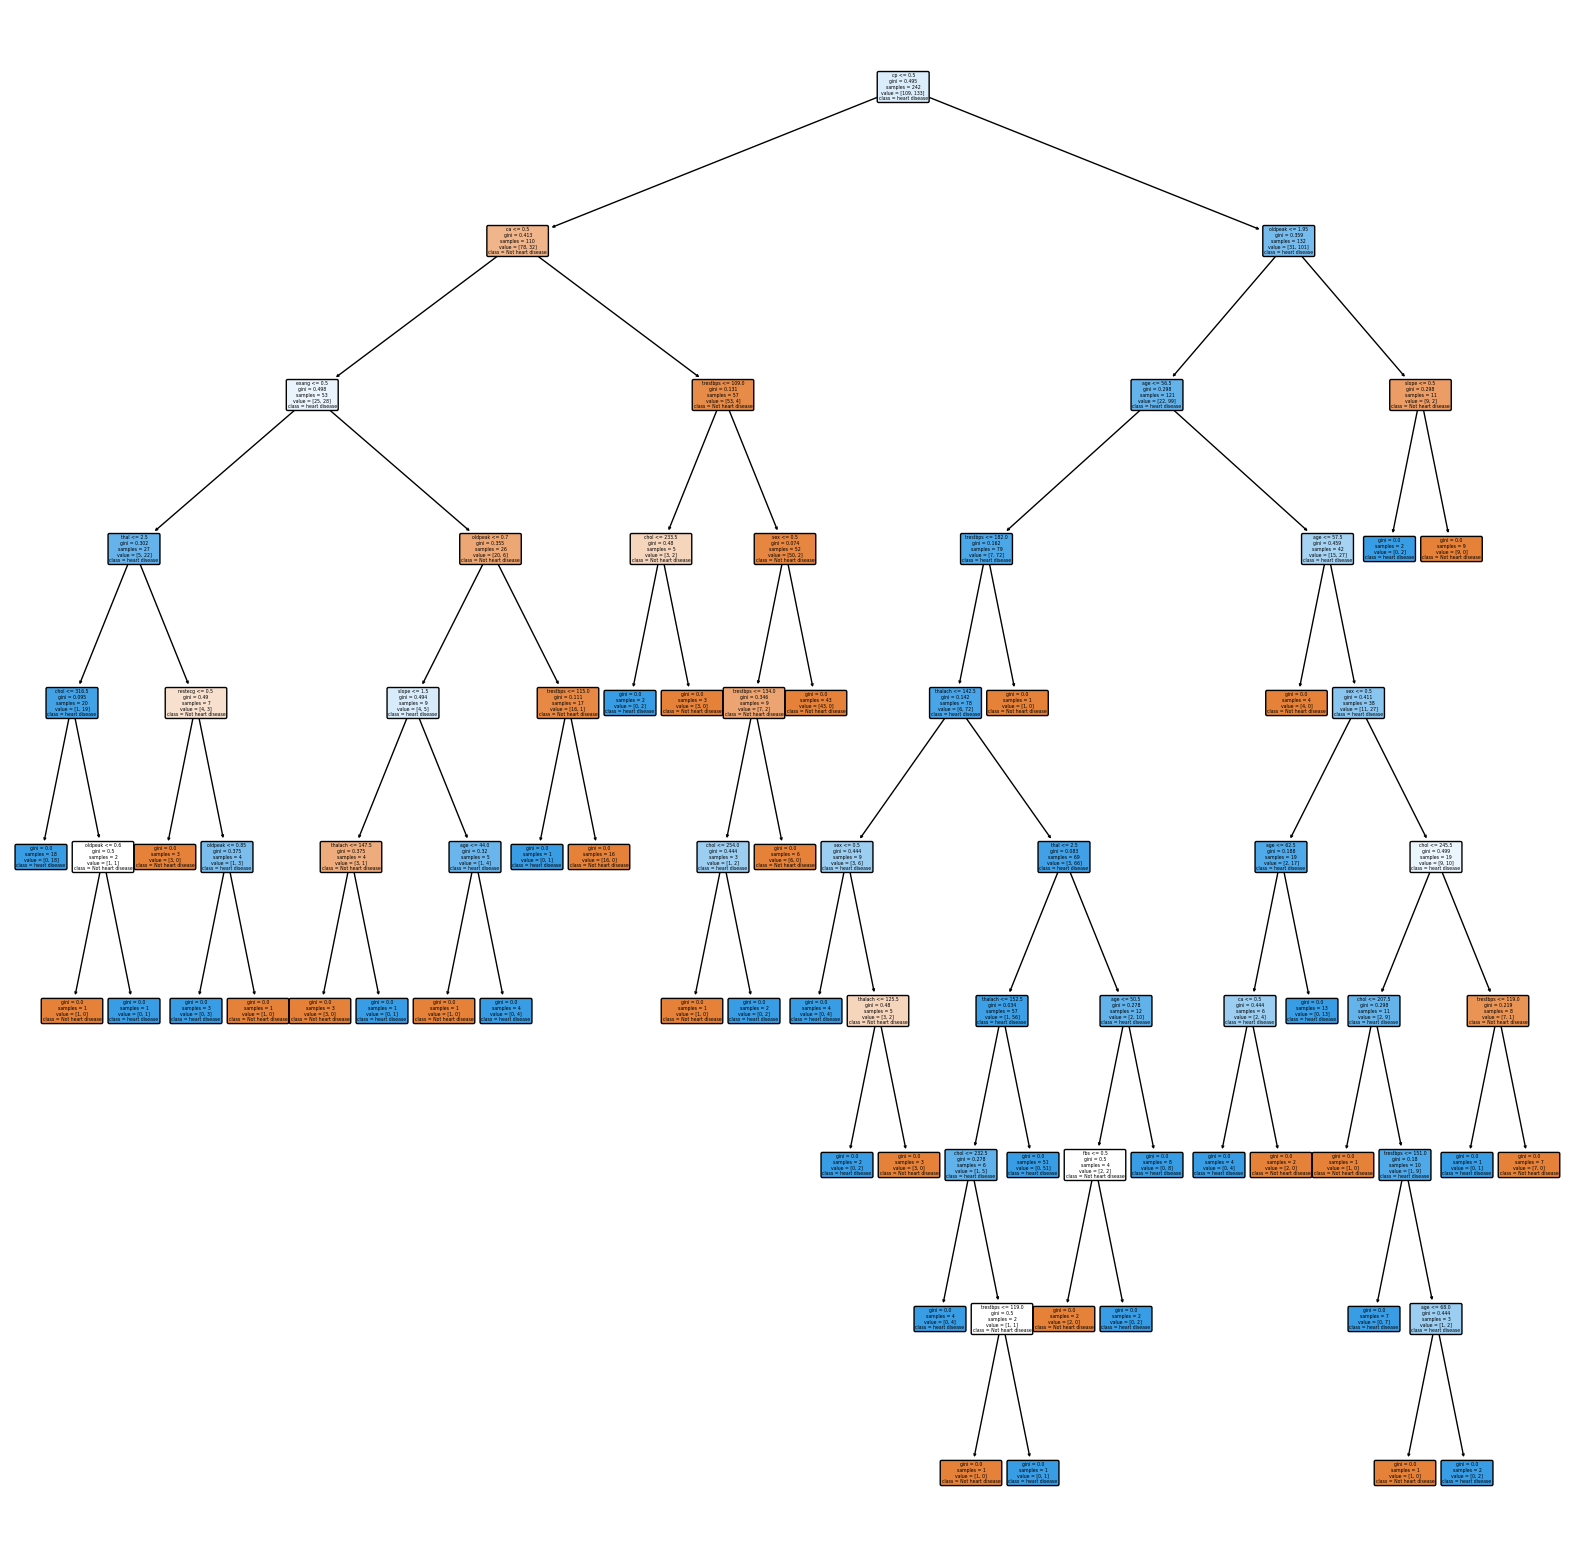

The depth of tree is =  9


In [22]:
tree_print(dtree)

_____________________
**Print the confusion matrix of train and test**
this function,
print train confusion matrix and
Display the confusion matrix for the training set and
Print test confusion matrix and
Display the confusion matrix for the test set before prunning.

Train Confusion matrix


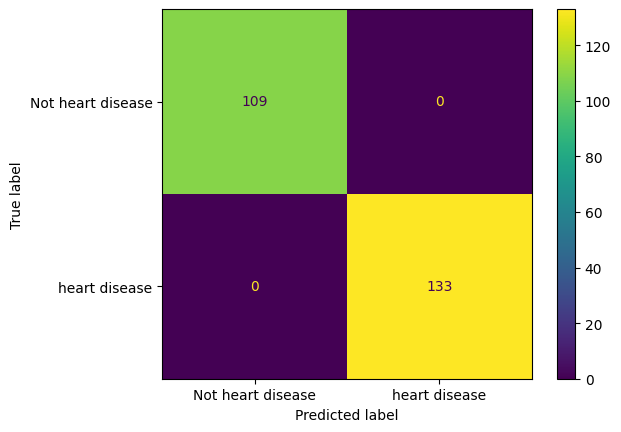

Test Confusion matrix


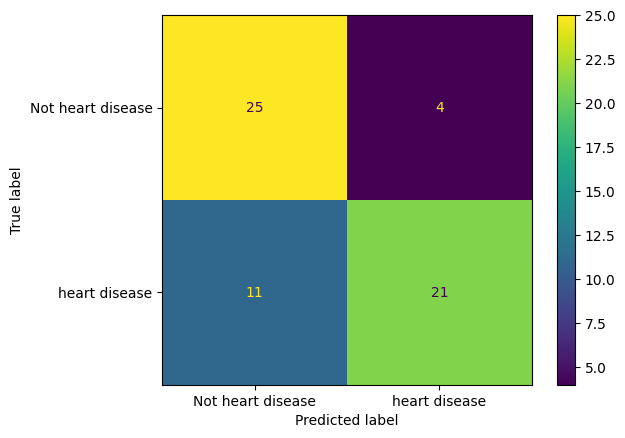

In [23]:
print("Train Confusion matrix")
confusion_matrix_print(y_train, train_predict, dtree)
print("Test Confusion matrix")
confusion_matrix_print(y_test, test_predict, dtree)

## Deal the overfitting using: Pre-Pruning
As the model memorizes the noise on the training data and can not get the important patterns(overfitting).
Pre-pruning(early stopping) is about stopping the growth of decision tree before become too complex and overfitting then start fitting the training data. This helps to become more underfitting and ensures the model generalizes well to new data.
GridSearchCV tries all combinations of hyperparameters one by one into the model and check the result then choose the best results among them.
Hyperparameter tuning is about searching for the optimal and the best combination of hyperparameter for early stopping and preventing overfitting are
- Criterion: the type of splitting "gini" or "entropy".
- Splitter: the strategy for selecting splits at each node "best" or "random".
- Max Depth: This sets the maximum depth of the tree.
- Min Samples Leaf: specify the minimum number of samples to form a leaf node.
- Min Samples Split: specify the minimum number of samples required to split an internal node.
- Random State: ensuring reproducibility by controlling the random during training.

In [24]:
params = {   "criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,9,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1)}

dtree = tree.DecisionTreeClassifier(random_state=42)
gcv = GridSearchCV(estimator=dtree,param_grid=params)
gcv.fit(X_train,y_train)
gcv.best_estimator_

print('Best parameters:', gcv.best_params_)


Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'random'}


In [25]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)  # the predicted values on the training
y_test_pred = model.predict(X_test) # the predicted values on the testing

print(f'Accuracy on train data after pruning: {accuracy_score(y_train_pred,y_train) * 100:.2f}%')
print(classification_report(y_train_pred, y_train))

print(f'Accuracy on test data after pruning: {accuracy_score(y_test_pred,y_test) * 100:.2f}%')
print(classification_report(y_test_pred, y_test))


Accuracy on train data after pruning: 85.12%
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.88      0.85      0.87       137

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242

Accuracy on test data after pruning: 81.97%
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



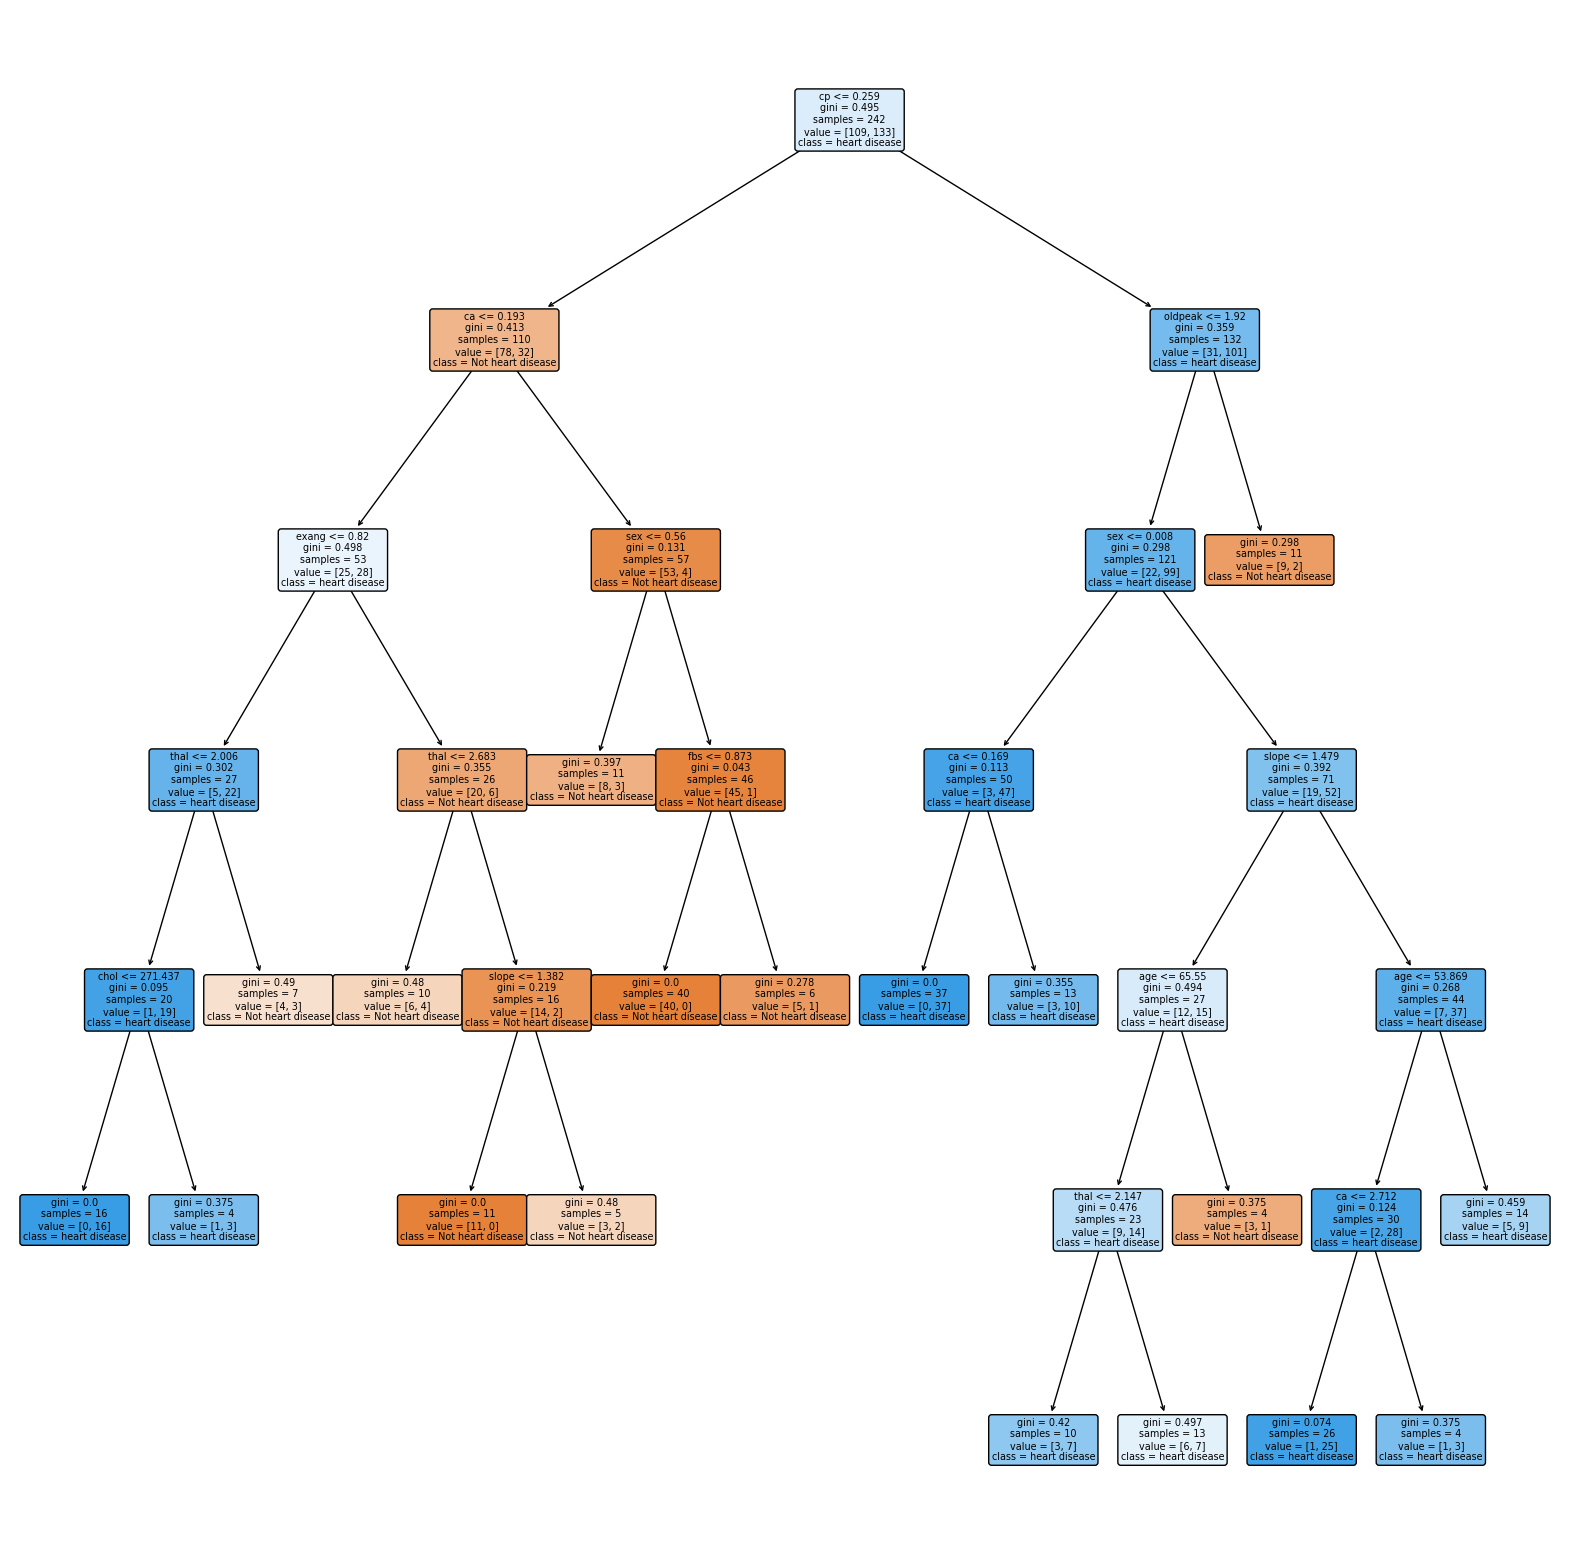

The depth of tree is =  6


In [26]:
tree_print(model)

Calculate the confusion matrix and Print the confusion matrix and
Extract individual values from the confusion matrix and
Print the counts of true positives, false positives, true negatives, and false negatives

Train Confusion matrix


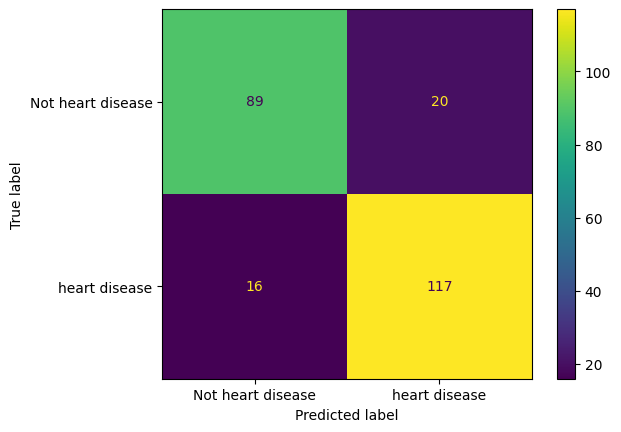

Test Confusion matrix


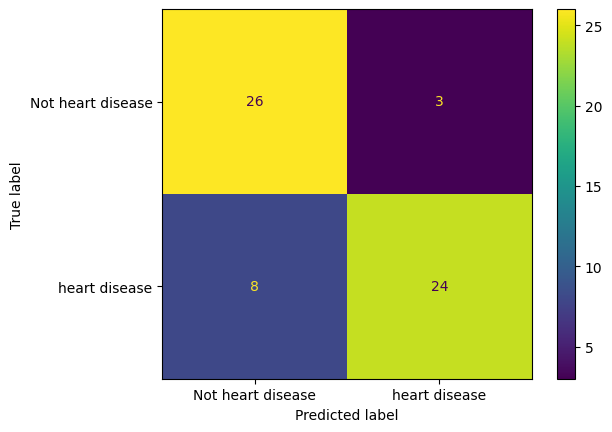

In [27]:
print("Train Confusion matrix")
confusion_matrix_print(y_train, y_train_pred, model)
print("Test Confusion matrix")
confusion_matrix_print(y_test, y_test_pred, model)

:training score shown decreasing when pruning and it is a trade-off between complexity of the DT, overfitting, and generalization.
As the goal is to achieve a model that performs well not only on the training data but also on unseen data, thus improving overall predictive performance.